<a href="https://colab.research.google.com/github/practice-grounds-wpaarth24/CNN/blob/main/IPD_Classification_Try_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pathlib
import numpy as np

data_dir = pathlib.Path("C:/Users/Paarth/Downloads/datasets/datasets")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Ganesh' 'Saraswati']


In [5]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pathlib

def view_random_image(target_dir):
  target_dir = pathlib.Path(target_dir)
  image_files = list(target_dir.glob("*"))
  img_path = random.choice(image_files)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.stem)
  plt.axis(False)
  plt.show()

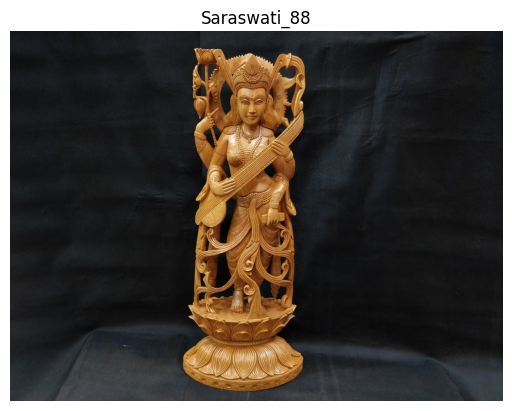

In [49]:
img = view_random_image("C:/Users/Paarth/Downloads/datasets/datasets/Saraswati")
ganesh_data = "C:/Users/Paarth/Downloads/datasets/datasets/Ganesh"
saraswati_data = "C:/Users/Paarth/Downloads/datasets/datasets/Saraswati"

In [53]:
import pathlib
import random
import shutil

def combine_data(ganesh_data, saraswati_data, train_split=0.6):
    # Create Train and Test directories
    train_dir = pathlib.Path("Train")
    test_dir = pathlib.Path("Test")
    train_dir.mkdir(exist_ok=True)
    test_dir.mkdir(exist_ok=True)

    # Create subdirectories for Ganesh and Saraswati within Train and Test
    for data_dir in [train_dir, test_dir]:
        (data_dir / "Ganesh").mkdir(exist_ok=True)
        (data_dir / "Saraswati").mkdir(exist_ok=True)

    # Split and copy data into respective directories
    ganesh_images = list(pathlib.Path(ganesh_data).glob("*"))
    saraswati_images = list(pathlib.Path(saraswati_data).glob("*"))
    ganesh_train, ganesh_test, saraswati_train, saraswati_test = split_data_into_train_test(
        ganesh_images, saraswati_images, train_split
    )

    for image_path in ganesh_train:
        shutil.copy(image_path, train_dir / "Ganesh" / image_path.name)
    for image_path in ganesh_test:
        shutil.copy(image_path, test_dir / "Ganesh" / image_path.name)
    for image_path in saraswati_train:
        shutil.copy(image_path, train_dir / "Saraswati" / image_path.name)
    for image_path in saraswati_test:
        shutil.copy(image_path, test_dir / "Saraswati" / image_path.name)

combine_data(ganesh_data, saraswati_data)

In [55]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = 'C:/Users/Paarth/Test'
train_dir = 'C:/Users/Paarth/Train'

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size=25,
                                               class_mode ='binary'
                                               )
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (224,224),
                                               batch_size=25,
                                               class_mode ='binary'
                                               )

Found 375 images belonging to 2 classes.
Found 252 images belonging to 2 classes.


In [62]:

import tensorflow_hub as hub
import tensorflow as tf

hub_layer = hub.KerasLayer("https://kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/1",
                   trainable=False)

hub_layer_wrapper = tf.keras.layers.Lambda(lambda x: hub_layer(x))

m = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224)),
    hub_layer_wrapper,
    tf.keras.layers.Dense(1, activation='sigmoid')
])


C:\Users\Paarth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [63]:
m.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [64]:
history = m.fit(train_data, epochs=5, validation_data=test_data)



Epoch 1/5


C:\Users\Paarth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.6458 - loss: 0.6720 - val_accuracy: 0.8095 - val_loss: 0.4098
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7778 - loss: 0.4384 - val_accuracy: 0.8373 - val_loss: 0.3398
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8194 - loss: 0.3723 - val_accuracy: 0.8651 - val_loss: 0.3026
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.8456 - loss: 0.3168 - val_accuracy: 0.8730 - val_loss: 0.2904
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9057 - loss: 0.2401 - val_accuracy: 0.8889 - val_loss: 0.2743


In [66]:
m.evaluate(test_data)

11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9159 - loss: 0.2477


[0.27428966760635376, 0.8888888955116272]

In [67]:
custom_image = mpimg.imread("C:/Users/Paarth/Downloads/Ganesh_test_image.jpeg")

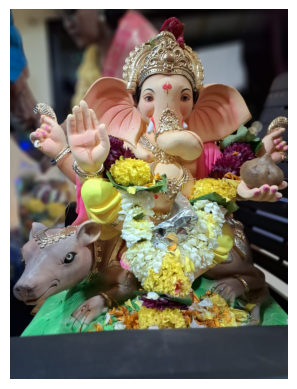

In [69]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.imshow(custom_image)
plt.axis("off")
plt.show()

In [72]:
custom_image.shape

(1600, 1200, 3)

In [73]:
def preprocess_image(filename):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, (224, 224))
  img = img/255.
  return img

In [75]:
ganesh = preprocess_image("C:/Users/Paarth/Downloads/Ganesh_test_image.jpeg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


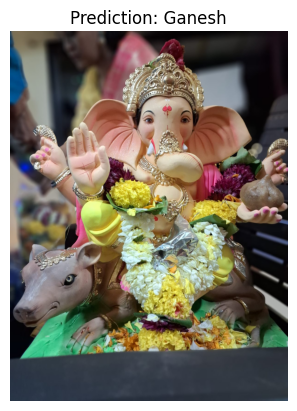

In [84]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_photo_with_prediction(image_path, model):
    img = mpimg.imread(image_path)
    preprocessed_image = preprocess_image(image_path)
    prediction = predict(model, preprocessed_image)

    plt.imshow(img)
    plt.title(f"Prediction: {prediction}")
    plt.axis("off")
    plt.show()

plot_photo_with_prediction("C:/Users/Paarth/Downloads/Ganesh_test_image.jpeg", m)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


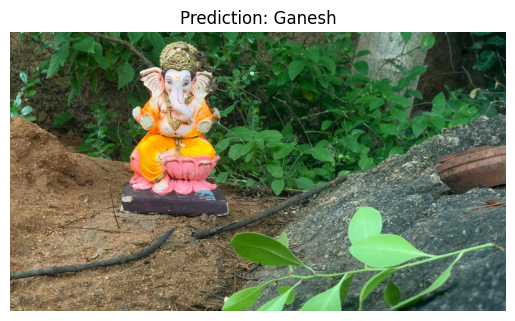

In [85]:
plot_photo_with_prediction("C:/Users/Paarth/Downloads/Broken_Ganesh.jpg", m)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


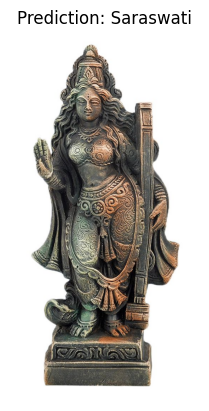

In [86]:
plot_photo_with_prediction("C:/Users/Paarth/Downloads/Saraswati_image.jpg", m)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


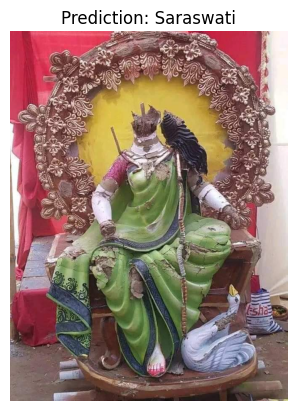

In [90]:
plot_photo_with_prediction("C:/Users/Paarth/Downloads/Broken_photo.jpg", m)

In [95]:
broke = preprocess_image("C:/Users/Paarth/Downloads/Broken_photo.jpg")

m.predict(tf.expand_dims(broke, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


array([[0.6046698]], dtype=float32)